In [18]:
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
df.iloc[:,:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


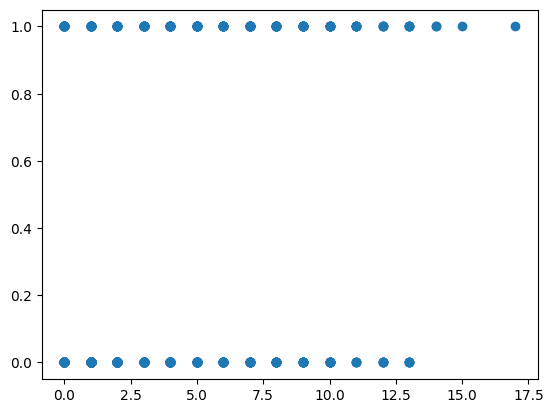

In [75]:
from matplotlib import pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,8])
plt.show()

In [76]:
for i in range(7):
    correlation = df.iloc[:, i].corr(df.iloc[:, 8])
    print(f"Correlation with target: {correlation}")
    

Correlation with target: 0.2218981530339867
Correlation with target: 0.4665813983068738
Correlation with target: 0.0650683595503328
Correlation with target: 0.07475223191831938
Correlation with target: 0.13054795488404786
Correlation with target: 0.2926946626444453
Correlation with target: 0.17384406565295996


In [255]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :8], df.iloc[:, 8], test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
model = SVC()

# Cross-validation (using 5-fold cross-validation)
cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='accuracy')

# Output cross-validation scores and mean
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Fit the model on the entire training data
model.fit(X_train_scaled, Y_train)

# Predict on the test data
Y_predict = model.predict(X_test_scaled)

# Evaluate the model
accuracy = classification_report(Y_test, Y_predict)
print(accuracy)


Cross-validation scores: [0.7962963  0.77777778 0.75700935 0.74766355 0.75700935]
Mean cross-validation score: 0.7671512634129456
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

